<a href="https://colab.research.google.com/github/tenserebel/Machine-Learning-Notebook/blob/main/iris_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Naive Bayes Classification

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# Importing the dataset
dataset = pd.read_csv("./iris.csv")

In [ ]:
dataset

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,NaN,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#looking at the first 5 values of the dataset
dataset.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,NaN,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
dataset.isnull().sum()

Sepal Length    0
Sepal Width     0
Petal Length    1
Petal Width     0
Species         0
dtype: int64

In [ ]:
dataset1=dataset.dropna()

In [ ]:
dataset1

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
dataset1.isnull().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Species         0
dtype: int64

In [ ]:
dataset1.skew()

Sepal Length    0.303098
Sepal Width     0.350101
Petal Length   -0.289459
Petal Width    -0.117808
dtype: float64

In [ ]:
dataset1.kurtosis()

Sepal Length   -0.553560
Sepal Width     0.318655
Petal Length   -1.385003
Petal Width    -1.328044
dtype: float64

<AxesSubplot:xlabel='Species', ylabel='Petal Length'>

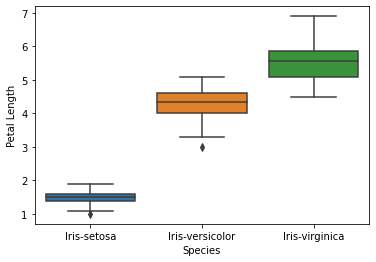

In [ ]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="Species", y="Petal Length", data=dataset1)

<AxesSubplot:xlabel='Sepal Length', ylabel='Sepal Width'>

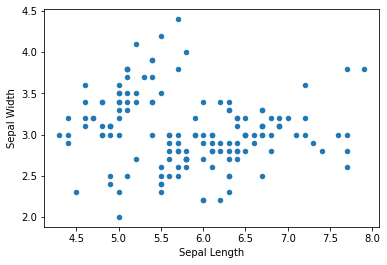

In [ ]:
# We'll use this to make a scatterplot of the Iris features.
dataset1.plot(kind="scatter", x="Sepal Length", y="Sepal Width")

<AxesSubplot:xlabel='Species', ylabel='Petal Length'>

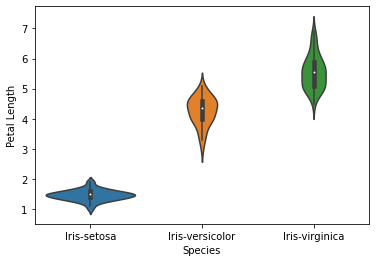

In [ ]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="Species", y="Petal Length", data=dataset1, size=6)

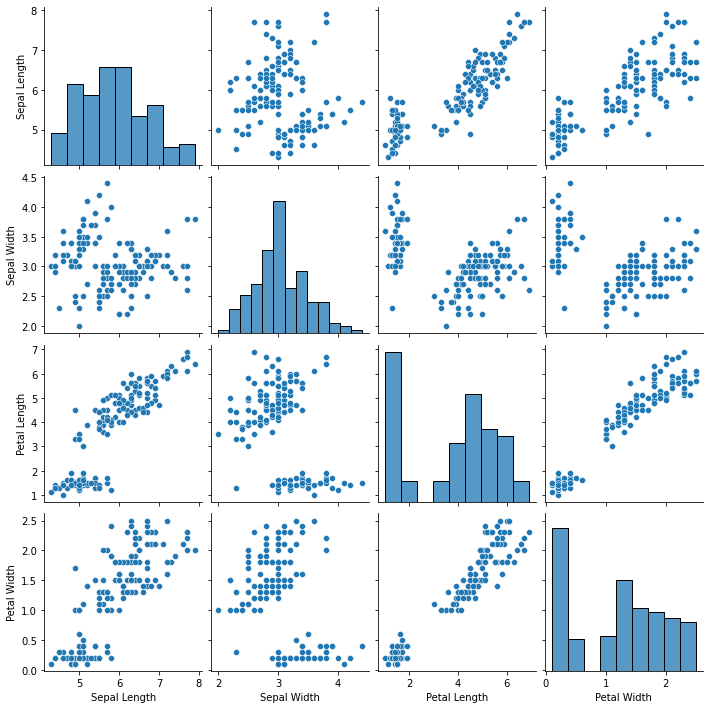

In [ ]:
sns.pairplot(dataset)

In [ ]:
dataset1.corr()

,Sepal Length,Sepal Width,Petal Length,Petal Width
Sepal Length,1.000000,-0.103784,0.871283,0.816971
Sepal Width,-0.103784,1.000000,-0.415218,-0.350733
Petal Length,0.871283,-0.415218,1.000000,0.962314
Petal Width,0.816971,-0.350733,0.962314,1.000000


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
# Seperating the data into dependent and independent variables
X = dataset1.iloc[:, :-1].values
y = dataset1.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predicting the Test set results
y_pred = nvclassifier.predict(X_test)
print(y_pred)

['Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica']


In [ ]:
#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:5,:]

array([['Iris-virginica', 'Iris-versicolor'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-setosa', 'Iris-setosa']], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)


Accuracy = 90.0


In [ ]:
confusion_matrix(y_test, y_pred)

array([[12,  0,  0],
       [ 0, 10,  0],
       [ 0,  3,  5]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.77      1.00      0.87        10
 Iris-virginica       1.00      0.62      0.77         8

       accuracy                           0.90        30
      macro avg       0.92      0.88      0.88        30
   weighted avg       0.92      0.90      0.89        30

